<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/CNN_Implementation_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 2 - CNN Implementation***

## **1. Importing libraries**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, AveragePooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

## **2. CNN Model Creation**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

np.random.seed(1000)

#Instantiation
model = Sequential()



#1st Convolutional Layer
model.add(ZeroPadding2D(input_shape=(28,28,1),padding=(2,2)))
model.add(Conv2D(filters=6,kernel_size=(5,5), strides=(1,1),padding='valid'))
model.add(AveragePooling2D())

#2nd Convolutional Layer
model.add(Conv2D(filters=16,kernel_size=(5,5), strides=(1,1)))
model.add(AveragePooling2D())

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(120, input_shape=(5,5,16,)))
# 2nd Fully Connected Layer
model.add(Dense(84,activation='relu'))

#Output Layer
model.add(Dense(10,activation='softmax'))

#Model Summary
model.summary()

Roll No: 20MAI0026
*****************************


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_57 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_58 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 400)               0         
_________________________________________________________________
de

## **3. Compiling the model**

In [ ]:
# Compiling the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

## **4. Loading the dataset**

In [ ]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Roll No: 20MAI0026
*****************************




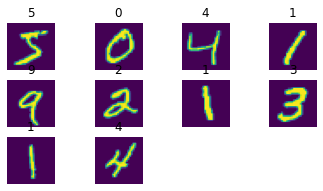

In [ ]:
# Displays 10 sample input images

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(4,4,i+1)
# plot raw pixel data
  plt.imshow(X_train[i])
  plt.title(str(y_train[i]))
  plt.axis('off')

# show the figure

plt.show()

## **5. Train Test Split**

In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

## **6. Feature Engineering**

In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255
X_val /= 255

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)
y_test=to_categorical(y_test,10)


## **7. Training the model**

In [ ]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
#Dataset details
print("Total number of images in database", X_train.shape[0]+X_val.shape[0]+X_test.shape[0])
print("Total number of images in training dataset", X_train.shape[0])
print("Total number of images in validation dataset", X_val.shape[0])
print("Total number of images in testing dataset", X_test.shape[0])
print("Size of image "+str(X_train.shape[1])+"*"+str(X_train.shape[2])+"*"+str(X_train.shape[3]))
print("Number of classes "+str(y_train.shape[1]))

Roll No: 20MAI0026
*****************************


Total number of images in database 70000
Total number of images in training dataset 54000
Total number of images in validation dataset 6000
Total number of images in testing dataset 10000
Size of image 28*28*1
Number of classes 10


In [ ]:
# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 24s 55ms/step - loss: 0.6790 - accuracy: 0.7960 - val_loss: 0.2146 - val_accuracy: 0.9363
Epoch 2/10
422/422 [==============================] - 23s 54ms/step - loss: 0.1841 - accuracy: 0.9461 - val_loss: 0.1432 - val_accuracy: 0.9557
Epoch 3/10
422/422 [==============================] - 23s 54ms/step - loss: 0.1363 - accuracy: 0.9592 - val_loss: 0.1279 - val_accuracy: 0.9607
Epoch 4/10
422/422 [==============================] - 23s 54ms/step - loss: 0.1063 - accuracy: 0.9676 - val_loss: 0.1081 - val_accuracy: 0.9680
Epoch 5/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0959 - accuracy: 0.9703 - val_loss: 0.1066 - val_accuracy: 0.9670
Epoch 6/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.1013 - val_accuracy: 0.9687
Epoch 7/10
422/422 [==============================] - 23s 54ms/step - loss: 0.0735 - accuracy: 0.9761 - val_loss: 0.1026 - val_accuracy:

## **8. Testing the model**

In [ ]:
#Making prediction
y_pred=model.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Roll No: 20MAI0026
*****************************




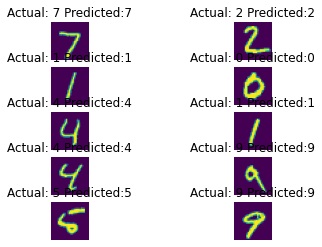

In [ ]:
#Display few test images and predictions

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(5,2,i+1)
# plot raw pixel data
  plt.imshow(X_test[i].reshape(X_test[i].shape[0], 28))
  plt.title("Actual: "+ str(y_true[i])+" Predicted:" + str(y_pred[i]))
  plt.axis('off')

# show the figure

plt.show()

## ***9. Evaluation Metrics***

### ***Confusion Matrix***

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Roll No: 20MAI0026
*****************************


Confusion matrix, without normalization


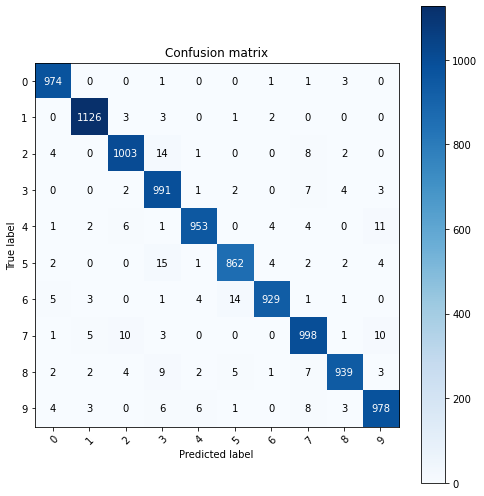

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix')

### ***Classification report***

In [ ]:
# Calculate Precision and Recall for each class

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

report = classification_report(y_true, y_pred)
print(report)

Roll No: 20MAI0026
*****************************


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### ***Accuracy***

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Roll No: 20MAI0026
*****************************


Accuracy Score =  0.9753
